# Import de pacotes

In [340]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import random
from pprint import pprint

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


# Conjunto de dados

## Dicionário das variáveis:

 **Temperature (K)}**:

**Luminosity(L/Lo)**:

**Radius(R/Ro)**:

**Absolute magnitude(Mv)**:

**Star Type**: Brown Dwarf = 0, Red Dwarf = 1, White Dwarf = 2, Main Sequence = 3, Supergiant = 4, Hypergiant = 5

**Star color**:

**Spectral Class**:

The Luminosity and radius of each star is calculated w.r.t. that of the values of Sun.

Lo = 3.828 x 10^26 Watts

Ro = 6.9551 x 10^8 m

## Carregamento dos dados

In [341]:
dados = pd.read_csv('stars_corrigido.csv')

In [342]:
dados.head()

,Temperature_(K),Luminosity(L/Lo),Radius(R/Ro),Absolute_magnitude(Mv),Star_type,Star_color,Spectral_Class
0,3068,0.002400,0.1700,16.12,0,red,M
1,3042,0.000500,0.1542,16.60,0,red,M
2,2600,0.000300,0.1020,18.70,0,red,M
3,2800,0.000200,0.1600,16.65,0,red,M
4,1939,0.000138,0.1030,20.06,0,red,M


In [343]:
dados.shape

(240, 7)

In [344]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature_(K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute_magnitude(Mv)  240 non-null    float64
 4   Star_type               240 non-null    int64  
 5   Star_color              240 non-null    object 
 6   Spectral_Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


## Preparando os dados

### Removendo espaços dos nomes das variáveis

In [345]:
dados.columns

Index(['Temperature_(K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute_magnitude(Mv)', 'Star_type', 'Star_color', 'Spectral_Class'],
      dtype='object')

In [346]:
dados.columns = ['Temperature_(K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute_magnitude(Mv)', 'Star_type', 'Star_color', 'Spectral_Class']

In [347]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature_(K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute_magnitude(Mv)  240 non-null    float64
 4   Star_type               240 non-null    int64  
 5   Star_color              240 non-null    object 
 6   Spectral_Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


### Variável resposta (alvo)

In [348]:
dados['Star_type'].unique()

array([0, 1, 2, 3, 4, 5])

In [349]:
dados['label'] = dados['Star_type'].astype('category')
dados_tree = dados.drop(['Star_type'], axis = 1)

In [350]:
dados_tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Temperature_(K)         240 non-null    int64   
 1   Luminosity(L/Lo)        240 non-null    float64 
 2   Radius(R/Ro)            240 non-null    float64 
 3   Absolute_magnitude(Mv)  240 non-null    float64 
 4   Star_color              240 non-null    object  
 5   Spectral_Class          240 non-null    object  
 6   label                   240 non-null    category
dtypes: category(1), float64(3), int64(1), object(2)
memory usage: 11.8+ KB


### Corrigindo type das variáveis categóricas

In [351]:
dados_tree['Star_color'] = dados_tree['Star_color'].astype('category')
dados_tree['Spectral_Class'] = dados_tree['Spectral_Class'].astype('category')

### Encoding data

In [352]:
dados_tree.head()

,Temperature_(K),Luminosity(L/Lo),Radius(R/Ro),Absolute_magnitude(Mv),Star_color,Spectral_Class,label
0,3068,0.002400,0.1700,16.12,red,M,0
1,3042,0.000500,0.1542,16.60,red,M,0
2,2600,0.000300,0.1020,18.70,red,M,0
3,2800,0.000200,0.1600,16.65,red,M,0
4,1939,0.000138,0.1030,20.06,red,M,0


In [353]:
list(dados_tree['Star_color'].unique())

['red',
 'blue-white',
 'white',
 'yellowish-white',
 'pale-yellow-orange',
 'blue',
 'whitish',
 'yellow-white',
 'orange',
 'yellowish',
 'orange-red']

In [354]:
star_color_dummies = pd.get_dummies(dados_tree['Star_color'])
star_color_dummies

,blue,blue-white,orange,orange-red,pale-yellow-orange,red,white,whitish,yellow-white,yellowish,yellowish-white
0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
235,1,0,0,0,0,0,0,0,0,0,0
236,1,0,0,0,0,0,0,0,0,0,0
237,0,0,0,0,0,0,1,0,0,0,0
238,0,0,0,0,0,0,1,0,0,0,0


In [355]:
dados_tree['Spectral_Class'].unique()

['M', 'B', 'A', 'F', 'O', 'K', 'G']
Categories (7, object): ['M', 'B', 'A', 'F', 'O', 'K', 'G']

In [356]:
spectral_class_dummies = pd.get_dummies(dados_tree['Spectral_Class'])
spectral_class_dummies

,A,B,F,G,K,M,O
0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
235,0,0,0,0,0,0,1
236,0,0,0,0,0,0,1
237,1,0,0,0,0,0,0
238,1,0,0,0,0,0,0


In [357]:
dados_tree_encoded = pd.concat([dados_tree.drop(['Star_color','Spectral_Class'], axis = 1),star_color_dummies,spectral_class_dummies], axis = 1) 
dados_tree_encoded.to_csv('stars_encoded.csv', index = False)
dados_tree_encoded

,Temperature_(K),Luminosity(L/Lo),Radius(R/Ro),Absolute_magnitude(Mv),label,blue,blue-white,orange,orange-red,pale-yellow-orange,red,white,whitish,yellow-white,yellowish,yellowish-white,A,B,F,G,K,M,O
0,3068,0.002400,0.1700,16.12,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,3042,0.000500,0.1542,16.60,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,2600,0.000300,0.1020,18.70,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,2800,0.000200,0.1600,16.65,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,1939,0.000138,0.1030,20.06,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
236,30839,834042.000000,1194.0000,-10.63,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
237,8829,537493.000000,1423.0000,-10.73,5,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
238,9235,404940.000000,1112.0000,-11.23,5,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


### Separando os dados entre teste e treino para o primeiro modelo que usara gini

In [358]:
random.seed(0)
X_G, y_G = dados_tree_encoded.drop('label', axis = 1), dados_tree_encoded['label']
X_train_G, X_test_G, y_train_G, y_test_G = train_test_split(X_G, y_G, test_size=0.2, random_state=1)

In [359]:
X_G

,Temperature_(K),Luminosity(L/Lo),Radius(R/Ro),Absolute_magnitude(Mv),blue,blue-white,orange,orange-red,pale-yellow-orange,red,white,whitish,yellow-white,yellowish,yellowish-white,A,B,F,G,K,M,O
0,3068,0.002400,0.1700,16.12,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,3042,0.000500,0.1542,16.60,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,2600,0.000300,0.1020,18.70,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,2800,0.000200,0.1600,16.65,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,1939,0.000138,0.1030,20.06,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
236,30839,834042.000000,1194.0000,-10.63,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
237,8829,537493.000000,1423.0000,-10.73,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
238,9235,404940.000000,1112.0000,-11.23,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [360]:
X_train_G

,Temperature_(K),Luminosity(L/Lo),Radius(R/Ro),Absolute_magnitude(Mv),blue,blue-white,orange,orange-red,pale-yellow-orange,red,white,whitish,yellow-white,yellowish,yellowish-white,A,B,F,G,K,M,O
0,3068,0.002400,0.17000,16.12,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
174,3600,240000.000000,1190.00000,-7.89,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
73,3150,0.008800,0.35000,11.94,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
183,3218,0.000452,0.09870,17.34,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
148,7723,0.000140,0.00878,14.81,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,3598,0.001100,0.56000,14.26,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
72,3304,0.008500,0.18000,13.20,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
140,13420,0.000590,0.00981,13.67,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
235,38940,374830.000000,1356.00000,-9.93,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [361]:
X_train_G.shape, X_test_G.shape

((192, 22), (48, 22))

In [362]:
X_G.columns

Index(['Temperature_(K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute_magnitude(Mv)', 'blue', 'blue-white', 'orange', 'orange-red',
       'pale-yellow-orange', 'red', 'white', 'whitish', 'yellow-white',
       'yellowish', 'yellowish-white', 'A', 'B', 'F', 'G', 'K', 'M', 'O'],
      dtype='object')

### Separando os dados entre teste e treino para o primeiro modelo que usara entropy

In [363]:
random.seed(0)
X_E, y_E = dados_tree_encoded.drop('label', axis = 1), dados_tree_encoded['label']
X_train_E, X_test_E, y_train_E, y_test_E = train_test_split(X_E, y_E, test_size=0.2, random_state=1)

In [364]:
X_E

,Temperature_(K),Luminosity(L/Lo),Radius(R/Ro),Absolute_magnitude(Mv),blue,blue-white,orange,orange-red,pale-yellow-orange,red,white,whitish,yellow-white,yellowish,yellowish-white,A,B,F,G,K,M,O
0,3068,0.002400,0.1700,16.12,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,3042,0.000500,0.1542,16.60,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,2600,0.000300,0.1020,18.70,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,2800,0.000200,0.1600,16.65,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,1939,0.000138,0.1030,20.06,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
236,30839,834042.000000,1194.0000,-10.63,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
237,8829,537493.000000,1423.0000,-10.73,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
238,9235,404940.000000,1112.0000,-11.23,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [365]:
X_train_E

,Temperature_(K),Luminosity(L/Lo),Radius(R/Ro),Absolute_magnitude(Mv),blue,blue-white,orange,orange-red,pale-yellow-orange,red,white,whitish,yellow-white,yellowish,yellowish-white,A,B,F,G,K,M,O
0,3068,0.002400,0.17000,16.12,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
174,3600,240000.000000,1190.00000,-7.89,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
73,3150,0.008800,0.35000,11.94,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
183,3218,0.000452,0.09870,17.34,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
148,7723,0.000140,0.00878,14.81,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,3598,0.001100,0.56000,14.26,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
72,3304,0.008500,0.18000,13.20,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
140,13420,0.000590,0.00981,13.67,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
235,38940,374830.000000,1356.00000,-9.93,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [366]:
X_train_E.shape, X_test_E.shape

((192, 22), (48, 22))

# **Treinando uma árvore de decisão gini**


## Testando a acuracia Gini

Text(0, 0.5, 'Acurácia do modelo')

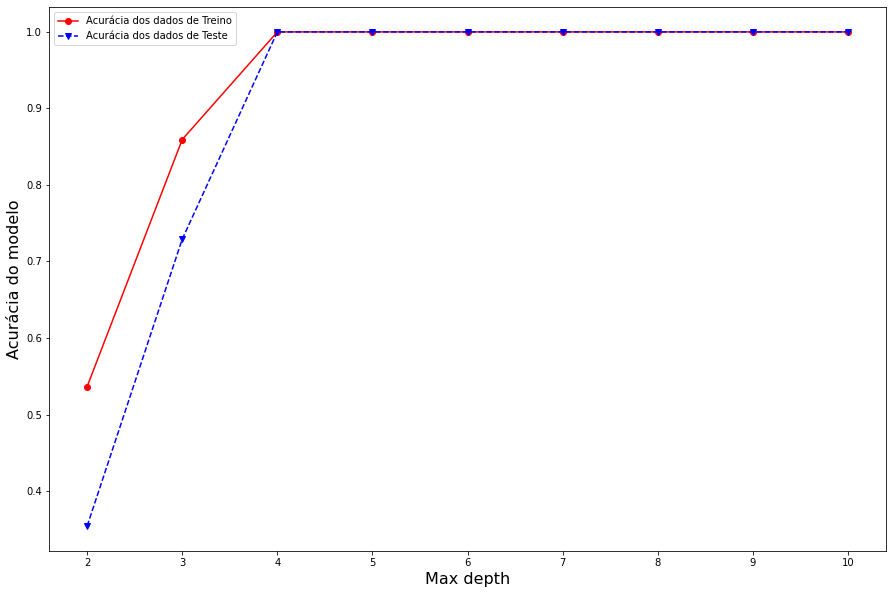

In [367]:
#########################################
# Criação de conjunto de treinamento e teste
#########################################

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score

#########################################
# Ajuste e avaliação do modelo
#########################################

maxdepths = [2,3,4,5,6,7,8,9,10]

trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth, criterion='gini')
    clf = clf.fit(X_train_G, y_train_G)
    y_predTrain_G = clf.predict(X_train_G)
    y_predTest_G = clf.predict(X_test_G)
    trainAcc[index] = accuracy_score(y_train_G, y_predTrain_G)
    testAcc[index] = accuracy_score(y_test_G, y_predTest_G)
    index += 1
    
#########################################
# Gráfico para testar em qual maxdepth atinge acuracia
#########################################
    
plt.figure(figsize=(15,10))   
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Acurácia dos dados de Treino','Acurácia dos dados de Teste'])
plt.xlabel('Max depth',  size = 16)
plt.ylabel('Acurácia do modelo',  size = 16)

## Maxdepth que da maior acuracia é o 4

In [368]:
clf = tree.DecisionTreeClassifier(criterion ='gini', max_depth=4)

In [369]:
clf = clf.fit(X_train_G,y_train_G)

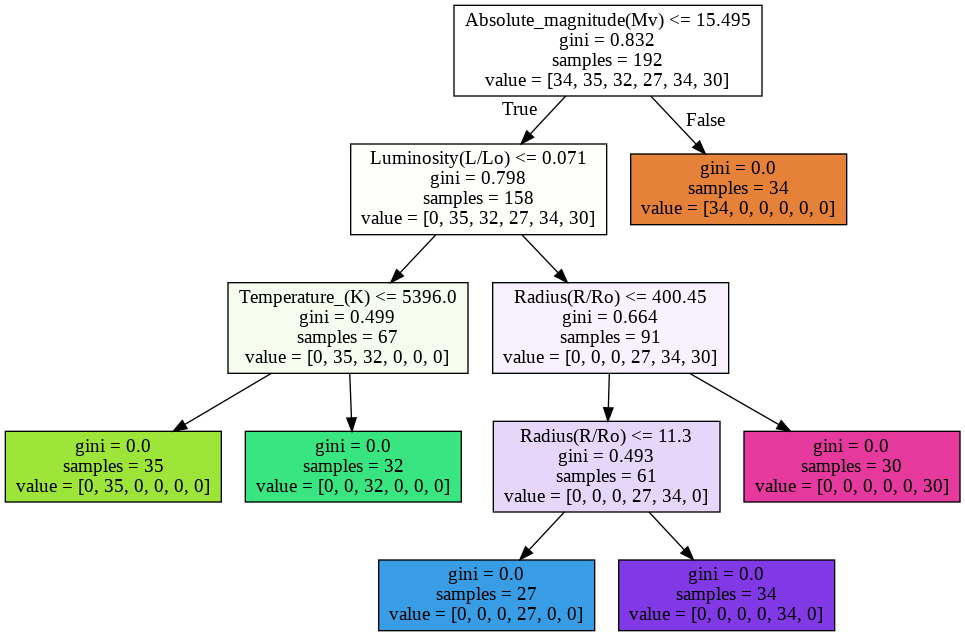

In [370]:
import pydotplus 
from IPython.display import Image
dados_arvore = tree.export_graphviz(clf, feature_names=X_G.columns, filled=True, out_file=None)
graph = pydotplus.graph_from_dot_data(dados_arvore) 
Image(graph.create_png())

# Classificando dados de teste

In [371]:
y_pred_G = clf.predict(X_test_G)

In [372]:
pd.DataFrame({'y_test':y_test_G,'y_pred': y_pred_G})

,y_test,y_pred
228,4,4
194,1,1
88,2,2
95,3,3
214,3,3
4,0,0
93,3,3
27,2,2
170,5,5
237,5,5


In [373]:
print("Accuracy:",metrics.accuracy_score(y_test_G, y_pred_G))

Accuracy: 1.0


# Classificando dados do treino

In [374]:
y_pred_train_G = clf.predict(X_train_G)

In [375]:
pd.DataFrame({'y_train':y_train_G,'y_pred_train': y_pred_train_G})

,y_train,y_pred_train
0,0,0
174,5,5
73,1,1
183,0,0
148,2,2
...,...,...
137,1,1
72,1,1
140,2,2
235,5,5


In [376]:
print("Accuracy:",metrics.accuracy_score(y_train_G, y_pred_train_G))

Accuracy: 1.0


# **Treinando uma árvore de decisão entropy**


## Testando a acuracia entropy

Text(0, 0.5, 'Acurácia do modelo')

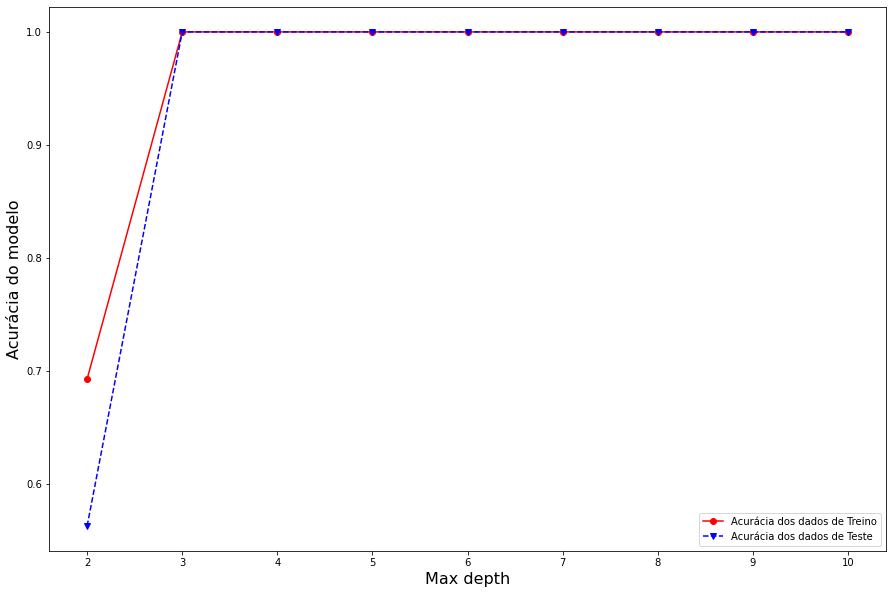

In [377]:
#########################################
# Criação de conjunto de treinamento e teste
#########################################

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score

#########################################
# Ajuste e avaliação do modelo
#########################################

maxdepths = [2,3,4,5,6,7,8,9,10]

trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf_2 = tree.DecisionTreeClassifier(max_depth=depth, criterion = 'entropy')
    clf_2 = clf_2.fit(X_train_G, y_train_G)
    y_predTrain_E = clf_2.predict(X_train_E)
    y_predTest_E = clf_2.predict(X_test_E)
    trainAcc[index] = accuracy_score(y_train_E, y_predTrain_E)
    testAcc[index] = accuracy_score(y_test_E, y_predTest_E)
    index += 1
    
#########################################
# Gráfico para testar em qual maxdepth atinge acuracia
#########################################
    
plt.figure(figsize=(15,10))   
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Acurácia dos dados de Treino','Acurácia dos dados de Teste'])
plt.xlabel('Max depth',  size = 16)
plt.ylabel('Acurácia do modelo',  size = 16)

## Maxdepth que da maior acuracia é o 3

In [378]:
clf_2 = tree.DecisionTreeClassifier(criterion ='entropy', max_depth=3)

In [379]:
clf_2 = clf_2.fit(X_train_E,y_train_E)

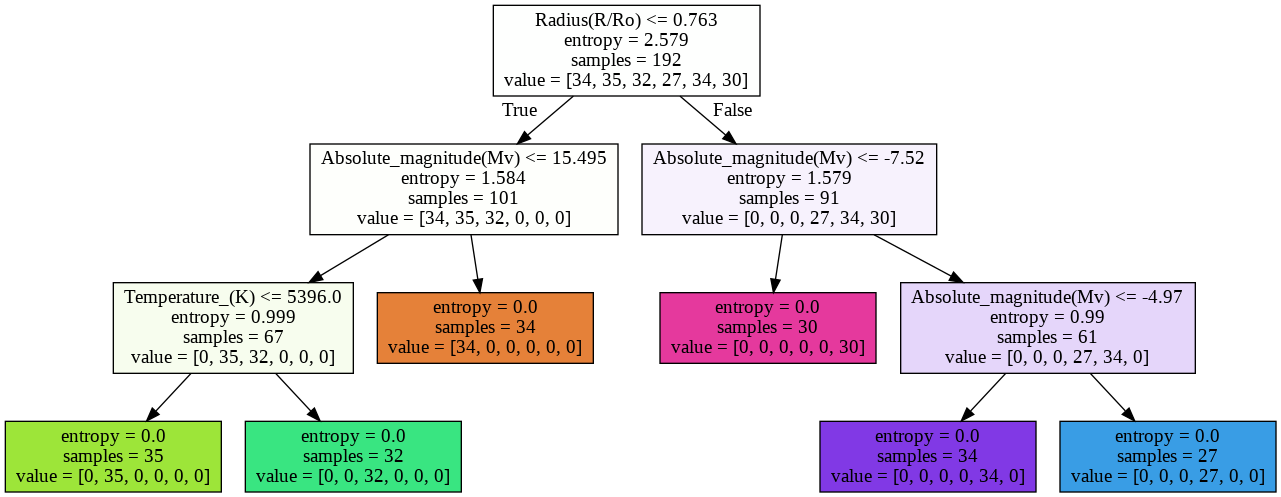

In [380]:
import pydotplus 
from IPython.display import Image
dados_arvore = tree.export_graphviz(clf_2, feature_names=X_E.columns, filled=True, out_file=None)
graph = pydotplus.graph_from_dot_data(dados_arvore) 
Image(graph.create_png())

# Classificando dados de teste 

In [381]:
y_pred_E = clf.predict(X_test_E)

In [382]:
pd.DataFrame({'y_test':y_test_E,'y_pred': y_pred_E})

,y_test,y_pred
228,4,4
194,1,1
88,2,2
95,3,3
214,3,3
4,0,0
93,3,3
27,2,2
170,5,5
237,5,5


In [383]:
print("Accuracy:",metrics.accuracy_score(y_test_E, y_pred_E))

Accuracy: 1.0


# Classificando dados de treino 

In [384]:
y_pred_train_E = clf.predict(X_train_E)

In [385]:
pd.DataFrame({'y_train':y_train_E,'y_pred_train': y_pred_train_E})

,y_train,y_pred_train
0,0,0
174,5,5
73,1,1
183,0,0
148,2,2
...,...,...
137,1,1
72,1,1
140,2,2
235,5,5


In [386]:
print("Accuracy:",metrics.accuracy_score(y_train_E, y_pred_train_E))

Accuracy: 1.0


# **Treinando a Árvore com apenas duas variáveis explicativas**

## testando a acuracia modelo reduzido

Text(0, 0.5, 'Acurácia do modelo')

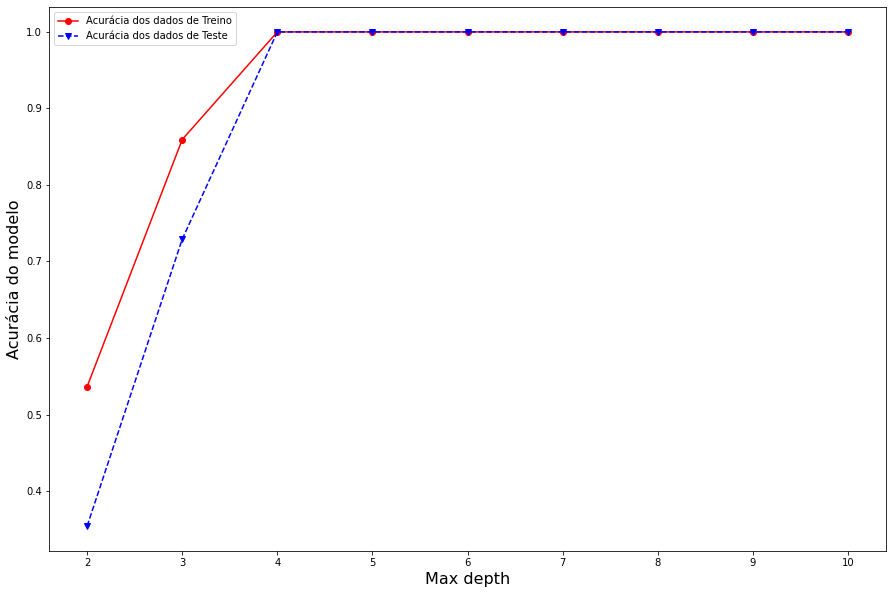

In [392]:

#########################################
# Criação de conjunto de treinamento e teste
#########################################

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score

#########################################
# Ajuste e avaliação do modelo
#########################################

maxdepths = [2,3,4,5,6,7,8,9,10]

trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf_3 = tree.DecisionTreeClassifier(max_depth=depth)
    clf_3 = clf_3.fit(X_train_3, y_train_3)
    y_predTrain_R = clf_3.predict(X_train_3)
    y_predTest_R = clf_3.predict(X_test_3)
    trainAcc[index] = accuracy_score(y_train_3, y_predTrain_R)
    testAcc[index] = accuracy_score(y_test_3, y_predTest_R)
    index += 1
    
#########################################
# Gráfico para testar em qual maxdepth atinge acuracia
#########################################
    
plt.figure(figsize=(15,10))   
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Acurácia dos dados de Treino','Acurácia dos dados de Teste'])
plt.xlabel('Max depth',  size = 16)
plt.ylabel('Acurácia do modelo',  size = 16)

In [387]:
random.seed(0)
X_3, y_3 = dados_tree_encoded[['Radius(R/Ro)','Absolute_magnitude(Mv)']], dados_tree_encoded['label']
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.2, random_state=1)

In [388]:
X_train_3.shape, X_test_3.shape

((192, 2), (48, 2))

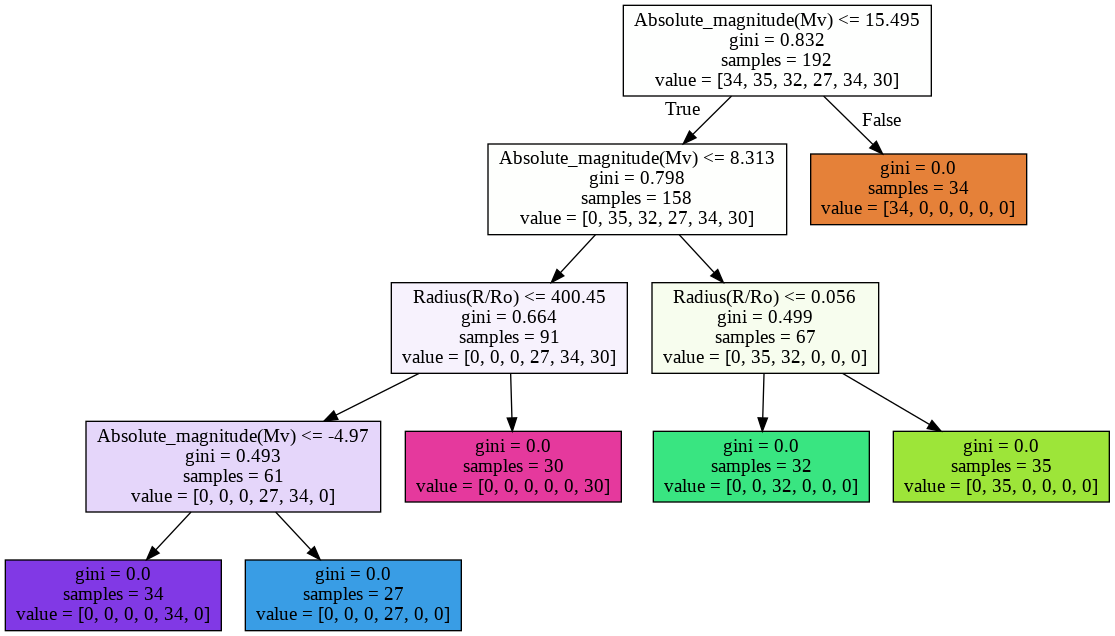

In [389]:
clf_3 = tree.DecisionTreeClassifier(max_depth = 4, criterion='gini')
clf_3 = clf_3.fit(X_train_3,y_train_3)
#dot_data = StringIO()
'''tree.export_graphviz(clf_3, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = ['Radius(R/Ro)','Absolute_magnitude(Mv)'],class_names=['0','1','2','3','4','5'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('estrelas_2.png')
Image(graph.create_png())'''

dados_arvore_3 = tree.export_graphviz(clf_3, feature_names=X_train_3.columns, filled=True, out_file=None)
graph = pydotplus.graph_from_dot_data(dados_arvore_3) 
Image(graph.create_png())

In [390]:
y_pred_3 = clf_3.predict(X_test_3)
print("Accuracy:",metrics.accuracy_score(y_test_3, y_pred_3))

Accuracy: 1.0


In [391]:
y_pred_train_3 = clf_3.predict(X_train_3)
print("Accuracy:",metrics.accuracy_score(y_train_3, y_pred_train_3))

Accuracy: 1.0
